## Quantum Gates Basics

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 0. Determine plot style
qml.drawer.use_style(style="sketch")

## Single Qubit

In [3]:
# 1. Define the device
dev = qml.device("default.qubit", wires=1)

In [4]:
# 2. Define the quantum circuit
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)
    return qml.probs(wires=0)

In [5]:
circuit()

tensor([0.5, 0.5], requires_grad=True)

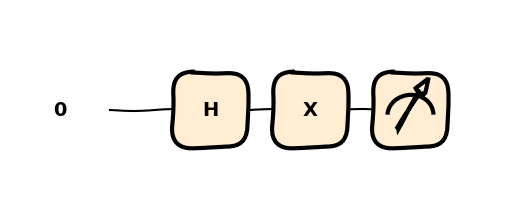

In [6]:
qml.draw_mpl(circuit)() # blank for argument
plt.show()

$$
\begin{align}
&|0\rangle \xrightarrow{H} \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \xrightarrow{X} \frac{1}{\sqrt{2}}(|1\rangle + |0\rangle) \equiv |\psi\rangle \\
&P(|\psi\rangle = |0\rangle) = |\langle 0|\psi\rangle|^2 = \frac{1}{2} \\
&P(|\psi\rangle = |1\rangle) = |\langle 1|\psi\rangle|^2 = \frac{1}{2}
\end{align}
$$

## Double Qubit

In [7]:
dev = qml.device("default.qubit", wires=2)

In [8]:
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.probs(wires=[0, 1])

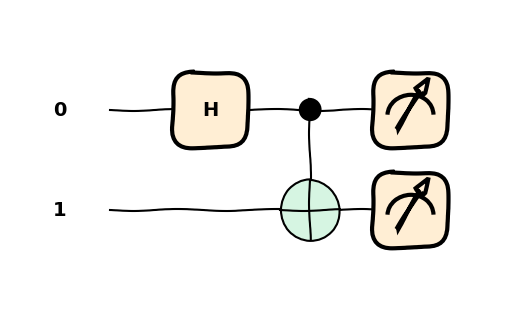

In [9]:
qml.draw_mpl(circuit)()
plt.show()

In [10]:
circuit()

tensor([0.5, 0. , 0. , 0.5], requires_grad=True)

$$
\begin{aligned}
&|0\rangle \otimes |0\rangle \xrightarrow{H \otimes I} H|0\rangle \otimes I|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |0\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |10\rangle) \\
\xrightarrow{\text{CNOT}(0,1)} &\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \quad \textbf{Bell State}
\end{aligned}
$$

In [11]:
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=0)
    return qml.probs(wires=[0, 1])

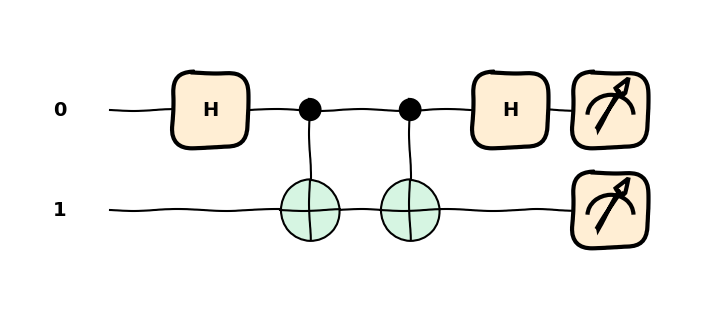

In [12]:
qml.draw_mpl(circuit)()
plt.show()

In [13]:
circuit()

tensor([1., 0., 0., 0.], requires_grad=True)

In [14]:
@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=1)
    qml.SWAP(wires=[0, 1])
    return qml.probs(wires=[0, 1])

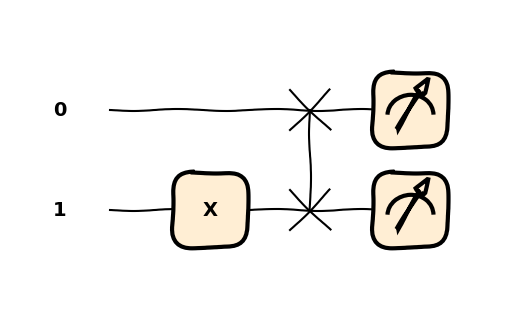

In [15]:
qml.draw_mpl(circuit)()
plt.show()

In [16]:
circuit()

tensor([0., 0., 1., 0.], requires_grad=True)

In [17]:
@qml.qnode(dev)
def circuit(x):
    qml.BasisStatePreparation(x, wires=[0, 1])
    return qml.probs(wires=[0, 1])

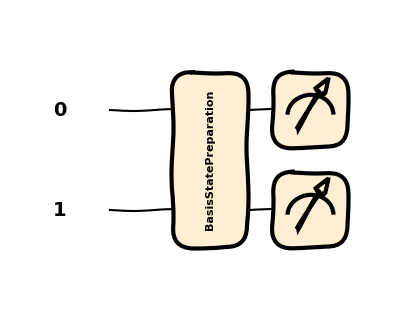

In [18]:
qml.draw_mpl(circuit)([1, 0])
plt.show()

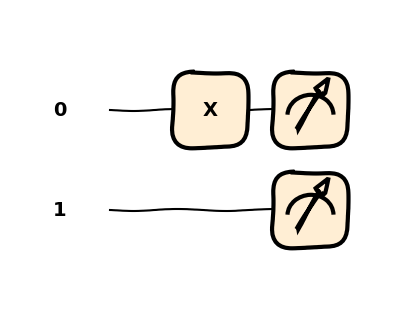

In [19]:
qml.draw_mpl(circuit, expansion_strategy="device")([1, 0])
plt.show()

In [20]:
circuit([1,1])

tensor([0., 0., 0., 1.], requires_grad=True)